In [9]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv('dataset/pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [11]:
df.rename(columns={'#': 'pid'}, inplace=True)
df.columns = df.columns.str.lower()

## Checking duplicated pid and removing the duplicated tuples

In [ ]:
df[df.duplicated('pid', keep=False)].head()

In [18]:
df.drop_duplicates('pid', keep='first', inplace=True)

In [19]:
df.isnull().sum()

pid             0
name            0
type 1          0
type 2        371
total           0
hp              0
attack          0
defense         0
sp. atk         0
sp. def         0
speed           0
generation      0
legendary       0
dtype: int64

In [20]:
df['type 2'].fillna(value='None', inplace=True)

In [21]:
df.isnull().sum()

pid           0
name          0
type 1        0
type 2        0
total         0
hp            0
attack        0
defense       0
sp. atk       0
sp. def       0
speed         0
generation    0
legendary     0
dtype: int64

In [24]:
pok_identity = df[['pid', 'name', 'type 1', 'type 2', 'generation', 'legendary']]

pok_stats = df[['pid', 'hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed','total']]

In [25]:
pok_identity.head()

,pid,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
4,4,Charmander,Fire,None,1,False
5,5,Charmeleon,Fire,None,1,False


In [26]:
pok_stats.head()

,pid,hp,attack,defense,sp. atk,sp. def,speed,total
0,1,45,49,49,65,65,45,318
1,2,60,62,63,80,80,60,405
2,3,80,82,83,100,100,80,525
4,4,39,52,43,60,50,65,309
5,5,58,64,58,80,65,80,405


# Distribution of pokemons among different generations

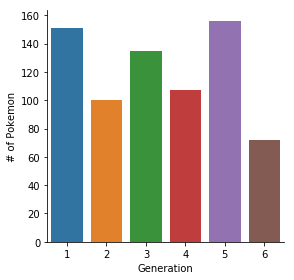

In [31]:
import seaborn as sns
sns.factorplot(
    x='generation', 
    data=pok_identity, 
    kind='count'
).set_axis_labels('Generation', '# of Pokemon');

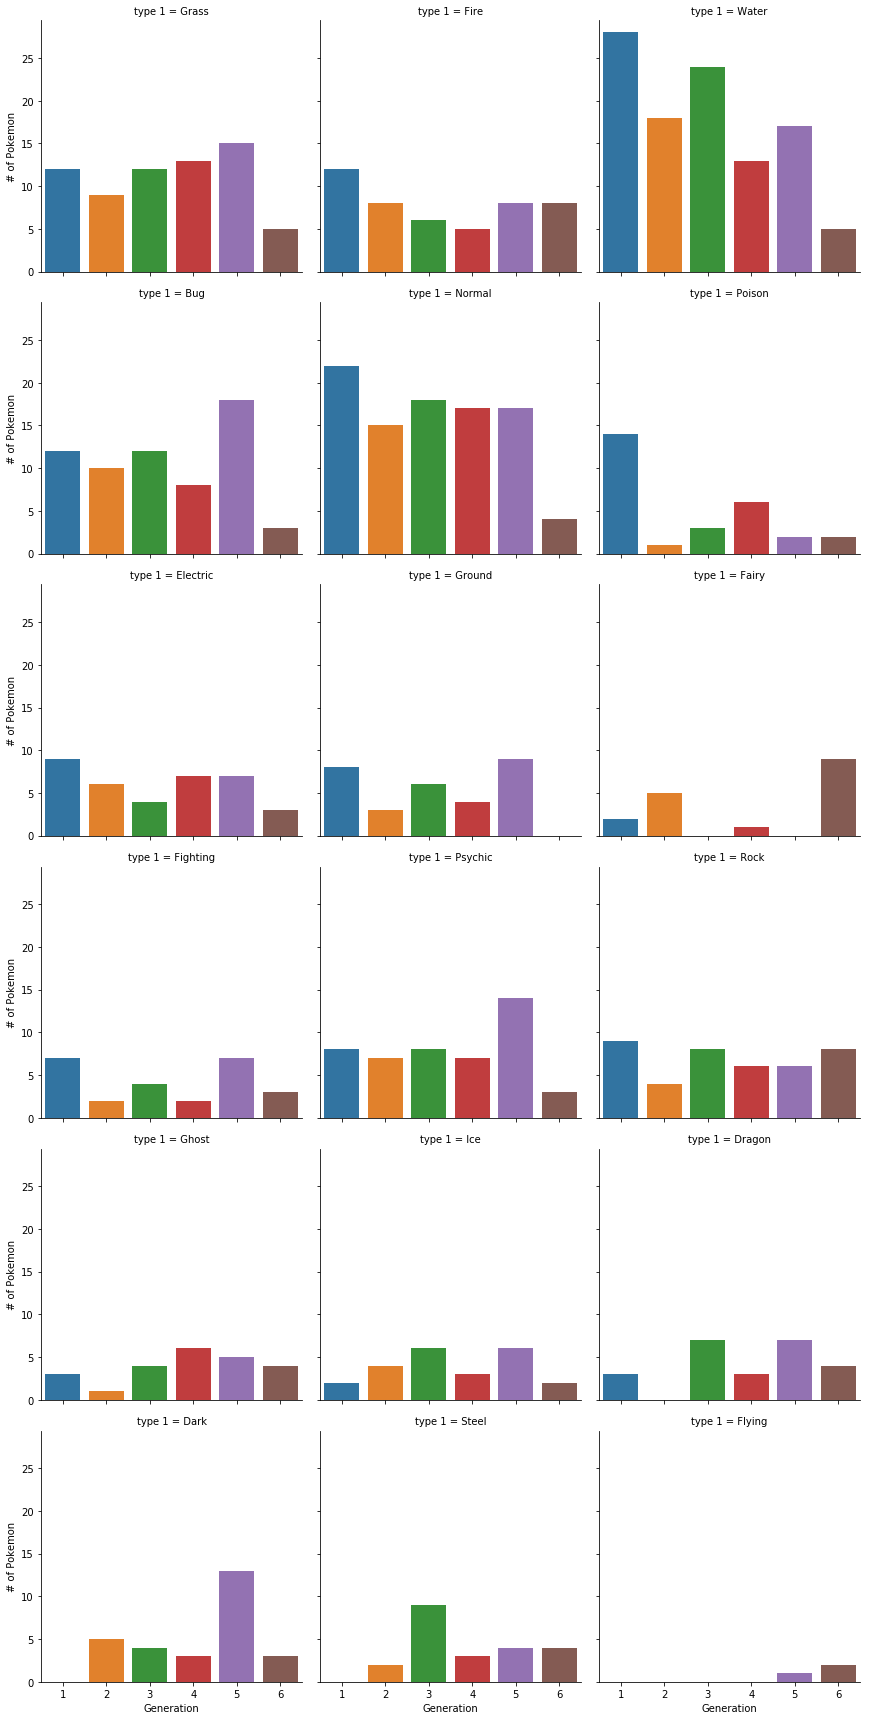

In [33]:
sns.factorplot(
    x='generation',
    data=pok_identity,
    col='type 1',
    kind='count',
    col_wrap=3
).set_axis_labels('Generation', '# of Pokemon');

In [36]:
no_type1, no_type2 = pok_identity.groupby('type 1'), pok_identity.groupby('type 2')
print('Type 1 count: {}'.format(len(no_type1)))
print('Type 2 count: {}'.format(len(no_type2)))

Type 1 count: 18
Type 2 count: 19


### extra count in type 2 is of None

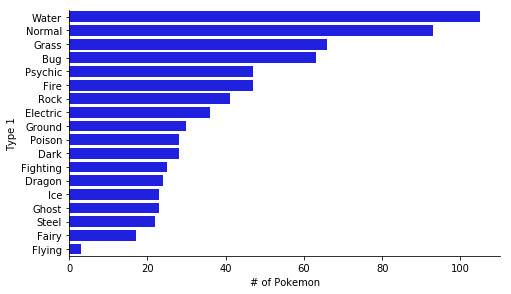

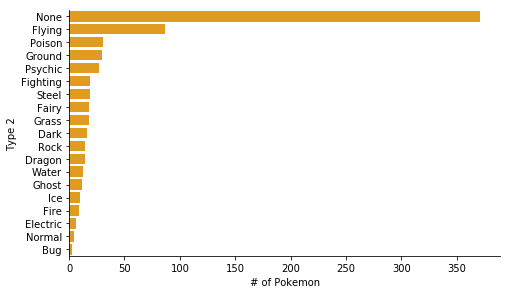

In [39]:
sns.factorplot(
    y='type 1',
    data=pok_identity,
    kind='count',
    order=pok_identity['type 1'].value_counts().index,
    aspect=1.8,
    color='blue'
).set_axis_labels('# of Pokemon', 'Type 1')

sns.factorplot(
    y='type 2',
    data=pok_identity,
    kind='count',
    order=pok_identity['type 2'].value_counts().index,
    aspect=1.8,
    color='orange'
).set_axis_labels('# of Pokemon', 'Type 2');


## Viewing the combination counts of both types

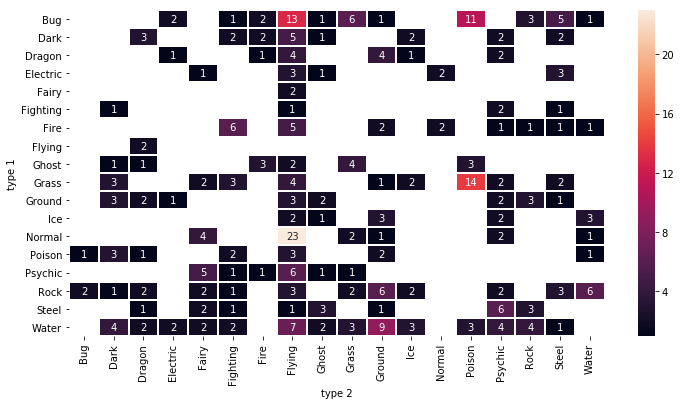

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
dual_types = pok_identity[pok_identity['type 2'] != 'None']

sns.heatmap(
    dual_types.groupby(['type 1', 'type 2']).size().unstack(),
    linewidths=1,
    annot=True
);

In [48]:
df.sort_values('total', ascending=False).head(10)

,pid,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
552,493,Arceus,Normal,None,720,120,120,120,120,120,120,4,True
707,644,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,5,True
544,487,GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,100,120,90,4,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
269,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
541,484,Palkia,Water,Dragon,680,90,120,100,150,120,100,4,True
706,643,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,5,True
540,483,Dialga,Steel,Dragon,680,100,120,120,150,100,90,4,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
162,150,Mewtwo,Psychic,None,680,106,110,90,154,90,130,1,True


## Since 'total' alone can't give a discrete rank let's normalize out data by removing 'total' attributes and making 'pid' as row label 

In [50]:
std_stats = pok_stats.drop('total', axis='columns').set_index('pid').apply(lambda x: (x - x.mean()) / x.std())
std_stats['power'] = std_stats.sum(axis='columns')
std_stats.reset_index(inplace=True)

# Ten strongest pokemons

In [67]:
pd.merge(
    pok_identity, 
    std_stats, 
    on='pid'
).sort_values('power', ascending=False).head(10)

,pid,name,type 1,type 2,generation,legendary,hp,attack,defense,sp. atk,sp. def,speed,power
492,493,Arceus,Normal,None,4,True,1.997038,1.543676,1.688730,1.770023,1.889253,1.990097,10.878816
486,487,GiratinaAltered Forme,Ghost,Dragon,4,True,3.157657,0.855689,1.688730,1.077948,1.889253,0.890307,9.559583
248,249,Lugia,Psychic,Flying,2,True,1.455415,0.511696,2.031255,0.731910,3.153223,1.623500,9.507000
249,250,Ho-oh,Fire,Flying,2,True,1.455415,1.887669,0.661154,1.423986,3.153223,0.890307,9.471754
715,716,Xerneas,Fairy,None,6,True,2.229161,1.922068,0.832417,2.150665,1.071389,1.220244,9.425945
716,717,Yveltal,Dark,Flying,6,True,2.229161,1.922068,0.832417,2.150665,1.071389,1.220244,9.425945
149,150,Mewtwo,Psychic,None,1,True,1.455415,1.199683,0.661154,2.946551,0.773985,2.356694,9.393482
642,643,Reshiram,Dragon,Fire,5,True,1.223292,1.543676,1.003679,2.808136,1.889253,0.890307,9.358342
483,484,Palkia,Water,Dragon,4,True,0.836418,1.543676,1.003679,2.808136,1.889253,1.256904,9.338066
383,384,Rayquaza,Dragon,Flying,3,True,1.416728,2.575656,0.661154,2.808136,0.773985,1.073605,9.309264


# Ten weakest pokemons

In [66]:
pd.merge(
    pok_identity, 
    std_stats, 
    on='pid'
).sort_values('power').head(10)

,pid,name,type 1,type 2,generation,legendary,hp,attack,defense,sp. atk,sp. def,speed,power
190,191,Sunkern,Grass,None,2,False,-1.484820,-1.552264,-1.393996,-1.344315,-1.456551,-1.309275,-8.541221
297,298,Azurill,Normal,Fairy,3,False,-0.711074,-1.896257,-1.051471,-1.690353,-1.084795,-1.675871,-8.109822
400,401,Kricketot,Bug,None,4,False,-1.214009,-1.724260,-1.017219,-1.517334,-1.047620,-1.492573,-8.013015
264,265,Wurmple,Bug,None,3,False,-0.904510,-1.036274,-1.222734,-1.690353,-1.456551,-1.675871,-7.986294
12,13,Weedle,Bug,Poison,1,False,-1.097947,-1.380267,-1.393996,-1.690353,-1.828307,-0.576081,-7.966952
9,10,Caterpie,Bug,None,1,False,-0.904510,-1.552264,-1.222734,-1.690353,-1.828307,-0.759379,-7.957548
279,280,Ralts,Psychic,Fairy,3,False,-1.562194,-1.724260,-1.565259,-0.825259,-1.270673,-0.942678,-7.890324
663,664,Scatterbug,Bug,None,6,False,-1.175321,-1.380267,-1.051471,-1.448127,-1.642429,-1.125976,-7.823592
128,129,Magikarp,Water,None,1,False,-1.871693,-2.240250,-0.537684,-1.863372,-1.828307,0.523710,-7.817596
348,349,Feebas,Water,None,3,False,-1.871693,-2.068254,-1.736521,-2.036391,-0.527161,0.523710,-7.716310


## Ten strongest easy to catch (non-legendary) pokemons

In [54]:
pd.merge(
    pok_identity[~pok_identity['legendary']],
    std_stats,
    on='pid'
).sort_values('power', ascending=False).head(10)

,pid,name,type 1,type 2,generation,legendary,hp,attack,defense,sp. atk,sp. def,speed,power
279,289,Slaking,Normal,None,3,False,3.157657,2.919649,1.003679,0.904929,-0.155405,1.256904,9.087412
460,488,Cresselia,Psychic,None,4,False,1.997038,-0.176291,1.688730,0.212854,2.261009,0.707008,6.690347
607,648,MeloettaAria Forme,Normal,Psychic,5,False,1.223292,0.064505,0.215872,2.046853,2.186657,0.890307,6.627485
665,706,Goodra,Dragon,None,6,False,0.836418,0.855689,-0.023896,1.423986,3.004521,0.523710,6.620428
241,251,Celebi,Psychic,Grass,2,False,1.223292,0.855689,1.003679,1.077948,1.145741,1.256904,6.563252
146,151,Mew,Psychic,None,1,False,1.223292,0.855689,1.003679,1.077948,1.145741,1.256904,6.563252
462,490,Manaphy,Water,None,4,False,1.223292,0.855689,1.003679,1.077948,1.145741,1.256904,6.563252
425,445,Garchomp,Dragon,Ground,4,False,1.532790,1.887669,0.832417,0.385873,0.588107,1.330223,6.557078
603,635,Hydreigon,Dark,Dragon,5,False,0.913793,1.027686,0.661154,1.943042,0.773985,1.183584,6.503244
363,373,Salamence,Dragon,Flying,3,False,1.029855,2.059666,0.318629,1.423986,0.402229,1.256904,6.491268


## Ten strongest combinations of primary and secondary types

In [56]:
pd.merge(
    pok_identity[pok_identity['type 2']!='None'],
    std_stats,
    on='pid'
).loc[:, ['pid','type 1','type 2','power']].sort_values('power', ascending=False).head(10)

,pid,type 1,type 2,power
234,487,Ghost,Dragon,9.559583
113,249,Psychic,Flying,9.507000
114,250,Fire,Flying,9.471754
345,717,Dark,Flying,9.425945
302,643,Dragon,Fire,9.358342
232,484,Water,Dragon,9.338066
180,384,Dragon,Flying,9.309264
231,483,Steel,Dragon,9.299880
303,644,Dragon,Electric,9.293747
305,646,Dragon,Ice,8.702948


In [68]:
tmp = pok_identity[~pok_identity['legendary']]
pd.merge(
    tmp[tmp['type 2']!='None'],
    std_stats,
    on='pid'
).loc[:, ['pid','type 1','type 2','power']].sort_values('power', ascending=False).head(10)

,pid,type 1,type 2,power
285,648,Normal,Psychic,6.627485
110,251,Psychic,Grass,6.563252
202,445,Dragon,Ground,6.557078
281,635,Dark,Dragon,6.503244
169,373,Dragon,Flying,6.491268
63,149,Dragon,Flying,6.480187
109,248,Rock,Dark,6.472608
286,649,Bug,Steel,6.427582
172,376,Steel,Psychic,6.376493
284,647,Water,Fighting,5.834391
